Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


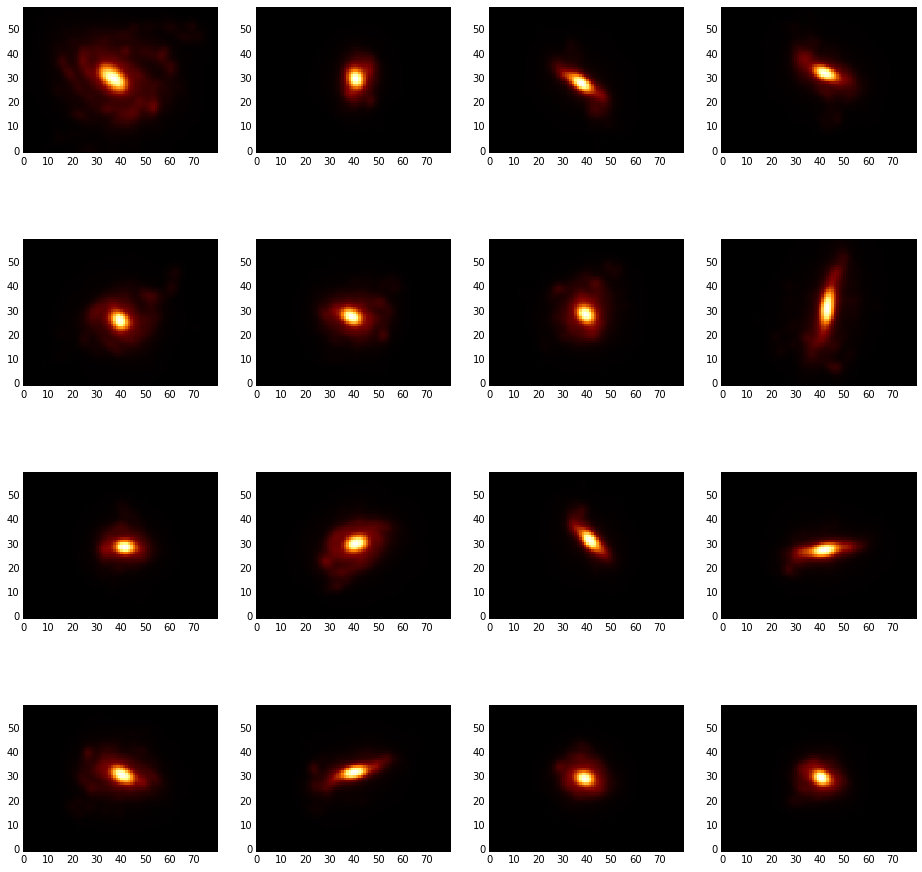

In [43]:
%pylab inline

import numpy
import astrohack_projections
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 16, 16
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

file_path = "/Users/dalyabaron/Downloads/cutout_242959.hdf5"
illustris_gal = astrohack_projections.illustris_model_and_image(file_path)
illustris_gal.set_image_shape((60, 80))

for i in xrange(16):
    xi_hat, eta_hat = astrohack_projections.choose_random_projection()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, 3)
    intensity = 1.5
    scale = 0.015 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(29., 31.)
    yshift = numpy.random.uniform(39., 41.)
    psf_size = 1.5
    bg = 0.
    
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0, 'psf_size':psf_size}
    illustris_gal.set_image_parameters(**kwargs)
    illustris_gal.construct_image()
    
    plt.subplot(4, 4, i+1)
    a, mid = numpy.percentile(illustris_gal.get_image(), [15., 85.])
    ran = mid - a
    vmin = mid - 5. * ran
    vmax = mid + 20. * ran
    plt.imshow(illustris_gal.get_image()+1, **plot_kwargs)

In [41]:
# create an album of 32 such objects with random projection + normaly distributed noise

# plot parameters
plt.rcParams['figure.figsize'] = 16, 16
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

# initial galaxy data
file_path = "/Users/dalyabaron/Downloads/cutout_242959.hdf5"
illustris_gal = astrohack_projections.illustris_model_and_image(file_path)
illustris_gal.set_image_shape((60, 80))

# album and PSF initialisation
album = astrohack_projections.album_and_model()
psf = astrohack_projections.mixture_of_gaussians(2)
psf.add_gaussian(1., numpy.array([0., 0.]), numpy.eye(2)*1.)

# galaxy model I fit with
basevar = 0.5 * numpy.eye(3)
gal_model = astrohack_projections.galaxy_model_3d()
v = numpy.random.uniform(0, 3, size=3) #[3., 0., 0.]
gal_model.add_gaussian(1.0, numpy.array([0., -1., 0.]), basevar + numpy.outer(v,v))
v = numpy.random.uniform(0, 3, size=3) #[-1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([2., 1., 0.]), basevar + numpy.outer(v,v))
v = numpy.random.uniform(0, 3, size=3) #[1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([-2., 1., 0.]), basevar + numpy.outer(v,v))

for i in xrange(32):
    # projection parameters
    xi_hat, eta_hat = astrohack_projections.choose_random_projection()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, 3)
    intensity = 20
    scale = 0.015 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(29.5, 31.)
    yshift = numpy.random.uniform(39.5, 41.)
    psf_size = 1.5
    bg = 0.
    # illustris galaxy
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0, 'psf_size':psf_size}
    illustris_gal.set_image_parameters(**kwargs)
    illustris_gal.construct_image(xi_hat, eta_hat)
    # image
    image = astrohack_projections.image_and_model()
    image.set_shape((60, 80))
    image.set_psf(psf)
    scale = 0.5
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0}
    image.set_parameters(**kwargs)
    image.set_galaxy(gal_model)
    image.set_ivar(numpy.ones(image.get_shape()))
    image.set_data(illustris_gal.get_image() + numpy.random.normal(size=image.get_shape())/ numpy.sqrt(image.ivar))
    # album
    album.add_image(image)
    
print len(album)

32


/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


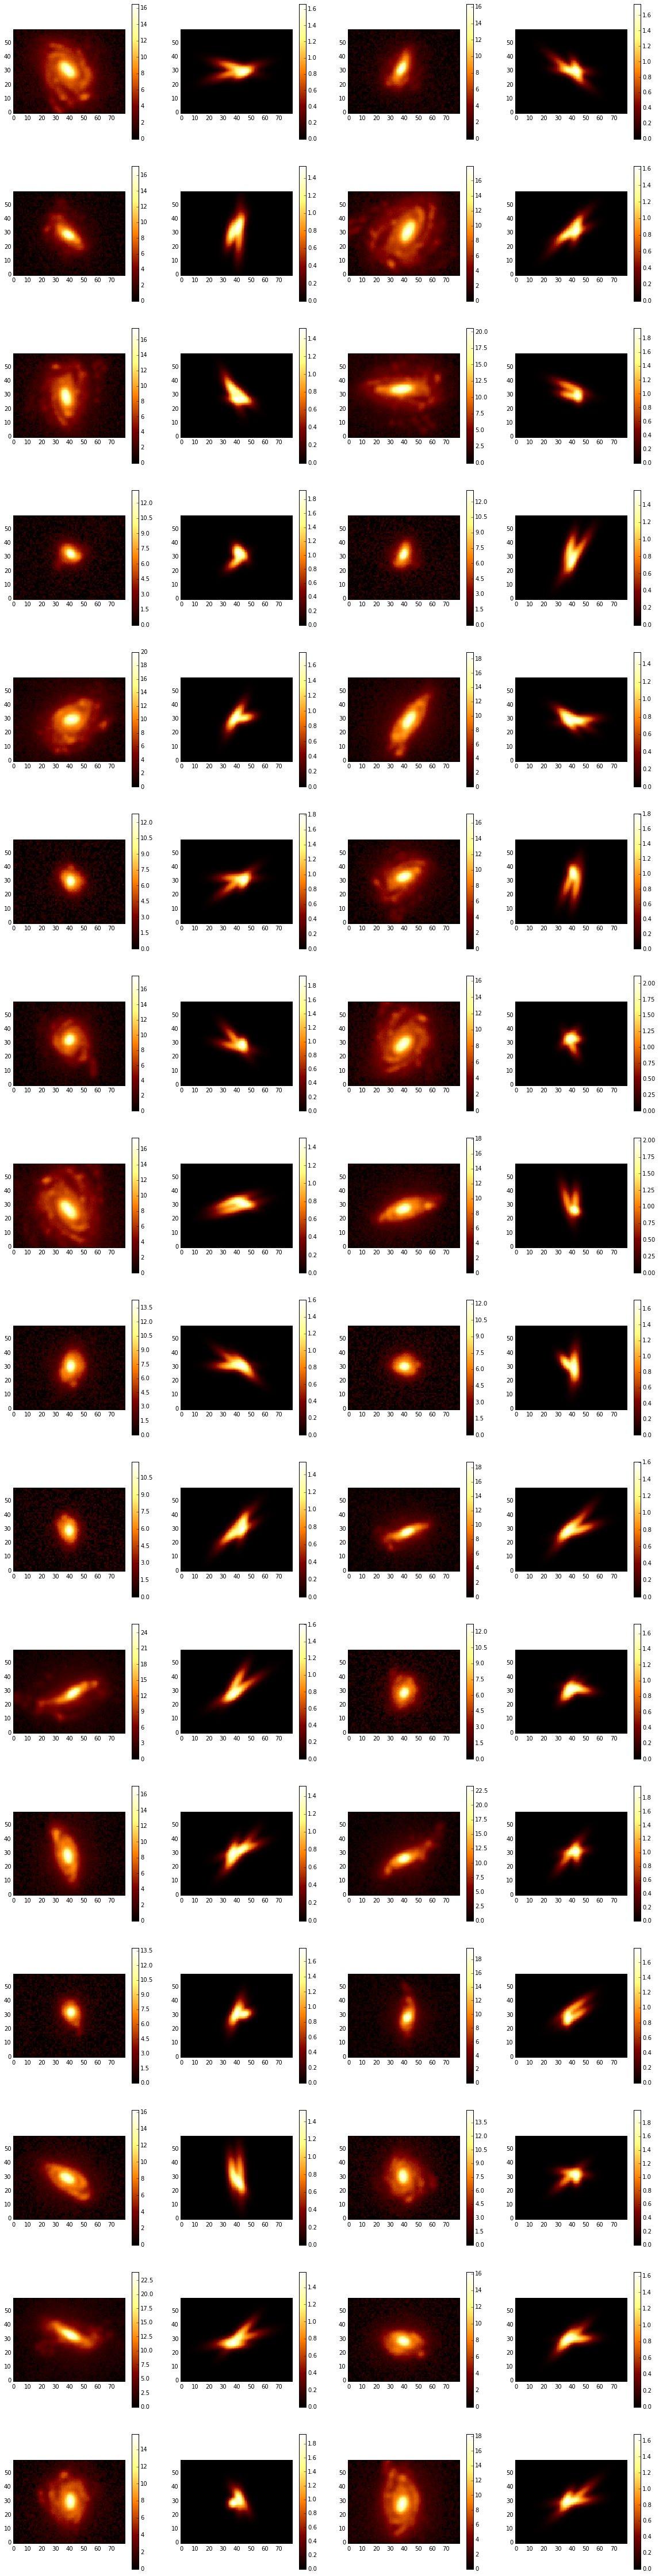

In [42]:
def showme(album):
    plt.rcParams['figure.figsize'] = 20, 80
    plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}
    for i in xrange(len(album)):
        image = album.get_all_images()[i]
        plt.subplot(16, 4, 2*i+1)
        vmin = -5. / numpy.sqrt(numpy.median(image.get_ivar())) # assumes bg = 0
        vmax = -2. * vmin # assumes bg = 0
        plt.imshow(numpy.nan_to_num(numpy.sqrt(image.get_data())), **plot_kwargs)
        plt.colorbar()
        plt.subplot(16, 4, 2*i+2)
        plt.imshow(numpy.nan_to_num(numpy.sqrt(image.get_synthetic())), **plot_kwargs)
        plt.colorbar()
        
showme(album)

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in sqrt
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in sqrt


(0, 80)

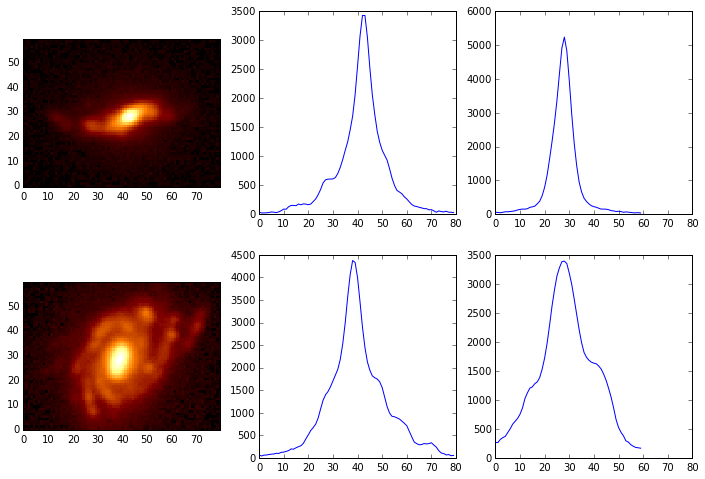

In [18]:
plt.rcParams['figure.figsize'] = 12, 8

# plot for example two of these galaxies and their light histogram
image_1 = album.get_all_images()[0]
image_2 = album.get_all_images()[1]

sum_1_x = numpy.sum(image_1.get_data(), axis=0)
sum_1_y = numpy.sum(image_1.get_data(), axis=1)
sum_2_x = numpy.sum(image_2.get_data(), axis=0)
sum_2_y = numpy.sum(image_2.get_data(), axis=1)

plt.subplot(2, 3, 1)
plt.imshow(numpy.nan_to_num(numpy.sqrt(image_1.get_data())), **plot_kwargs)
plt.subplot(2, 3, 2)
plt.plot(sum_1_x)
plt.xlim(0, 80)
plt.subplot(2, 3, 3)
plt.plot(sum_1_y)
plt.xlim(0, 80)

plt.subplot(2, 3, 4)
plt.imshow(numpy.nan_to_num(numpy.sqrt(image_2.get_data())), **plot_kwargs)
plt.subplot(2, 3, 5)
plt.plot(sum_2_x)
plt.xlim(0, 80)
plt.subplot(2, 3, 6)
plt.plot(sum_2_y)
plt.xlim(0, 80)

{'beta': 17.286919886785078, 'scale': 1, 'bg': 0.0, 'yshift': 40.948658007306726, 'xshift': 30.66280774934001, 'alpha': 176.92318705358673, 'intensity': 20, 'gamma': 339.68804315247417}
{'beta': 335.0037339994243, 'scale': 1, 'bg': 0.0, 'yshift': 39.63285243952303, 'xshift': 30.9735348724383, 'alpha': 7.9292522577579083, 'intensity': 20, 'gamma': 162.56933906924331}
{'beta': 179.08784303333007, 'scale': 1, 'bg': 0.0, 'yshift': 39.66586099626983, 'xshift': 29.9488218852435, 'alpha': 55.369875754731197, 'intensity': 20, 'gamma': 39.767653528878661}
{'beta': 137.82220813174257, 'scale': 1, 'bg': 0.0, 'yshift': 39.681374694522866, 'xshift': 30.13277480960852, 'alpha': 129.01729822354679, 'intensity': 20, 'gamma': 3.2425764038465488}
{'beta': 12.96039184721109, 'scale': 1, 'bg': 0.0, 'yshift': 39.62138366665347, 'xshift': 29.6652055251155, 'alpha': 215.59838912553147, 'intensity': 20, 'gamma': 249.71244588409795}
{'beta': 308.248051762996, 'scale': 1, 'bg': 0.0, 'yshift': 40.86505169460173,

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


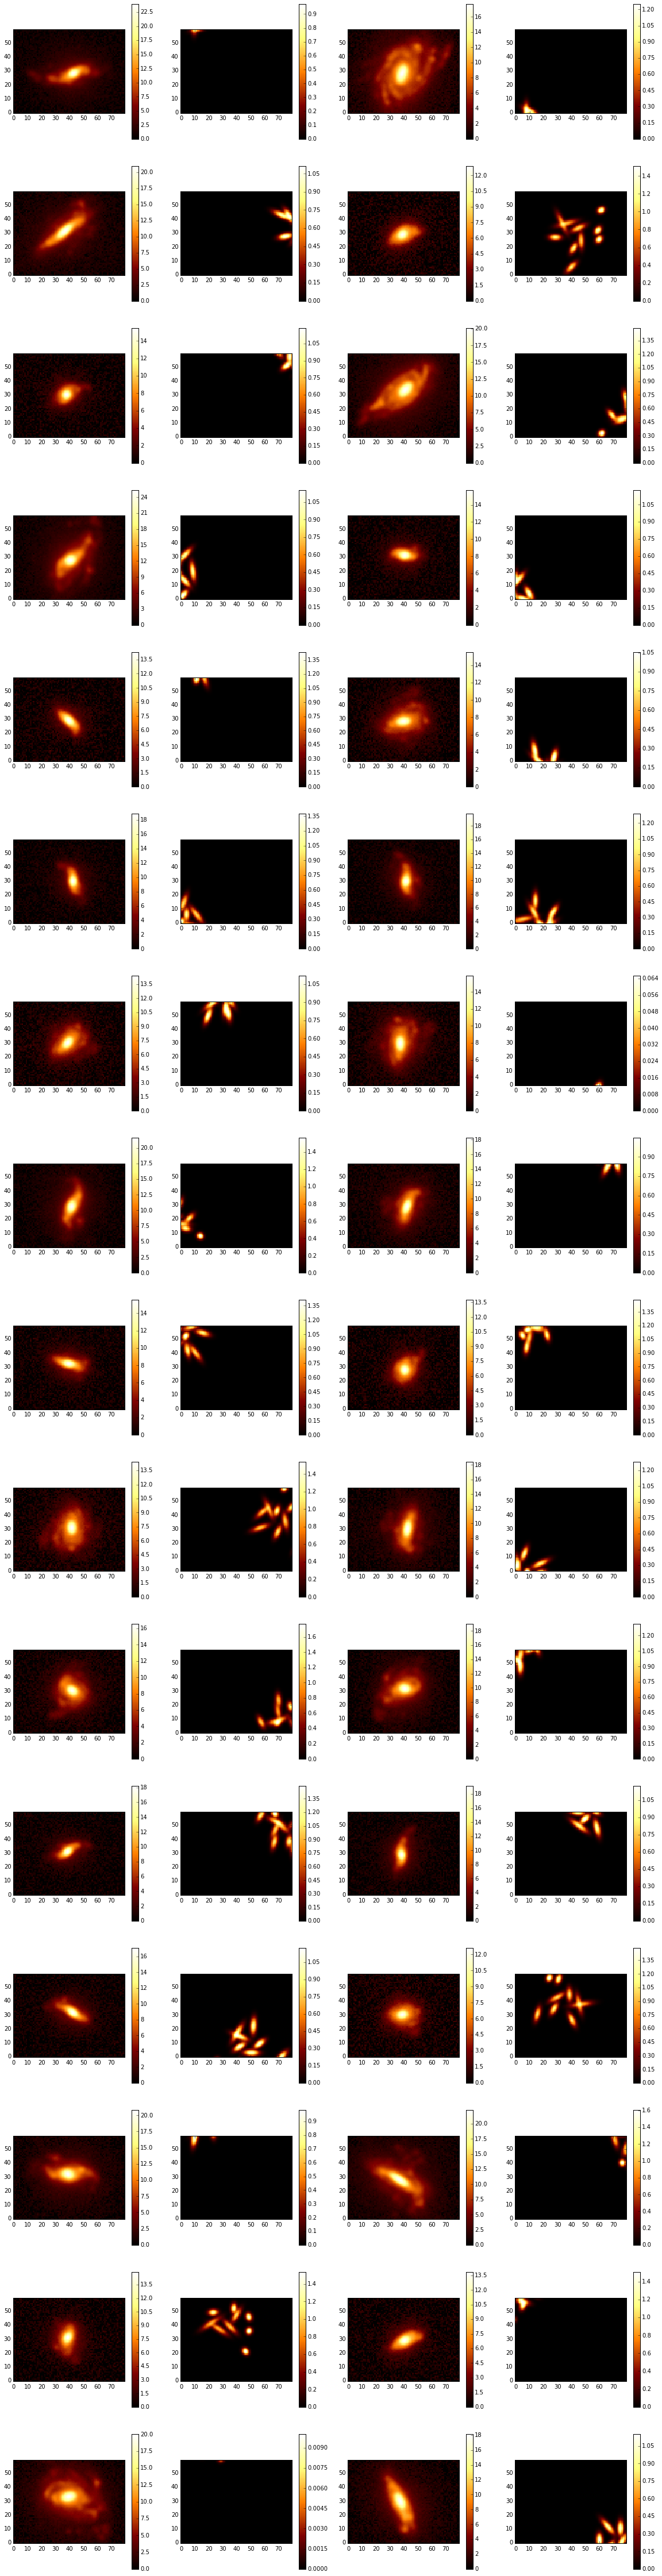

In [27]:
basevar = 0.1 * numpy.eye(3)
gal_model = astrohack_projections.galaxy_model_3d()
num_of_gaussians = 10

for i in xrange(num_of_gaussians):
    mu = numpy.random.uniform(10, 50, size=3)
    v = numpy.random.uniform(-3, 3, size=3)
    fi = basevar + numpy.outer(v, v)
    gal_model.add_gaussian(1.0, mu, fi)

# album and PSF initialisation
album_new = astrohack_projections.album_and_model()
psf = astrohack_projections.mixture_of_gaussians(2)
psf.add_gaussian(1., numpy.array([0., 0.]), numpy.eye(2)*1.)

for i in xrange(32):
    image = album.get_all_images()[i]
    data = image.get_data()
    parameters = image.get_parameters()
    print parameters
    # image
    image = astrohack_projections.image_and_model()
    image.set_shape((60, 80))
    image.set_psf(psf)
    parameters['scale'] = 1
    image.set_parameters(**parameters)
    image.set_galaxy(gal_model)
    image.set_ivar(numpy.ones(image.get_shape()))
    image.set_data(data)
    # album
    album_new.add_image(image)
    
showme(album_new)
album_new.set_galaxy(gal_model)
plt.savefig("./fitting_pngs/illustris_242959_complex/initialisation.pdf")

100
album before 122395323.424
image before 7753875.73337
image before 6124179.15108
image before 7688199.81114
image before 784916.969444
image before 1172269.0661
image before 8728463.44021
image before 13999323.3387
image before 1392297.68871
image before 1007281.92019
image before 1979290.586
image before 2442506.24125
image before 3242410.23289
image before 1288348.29693
image before 2244332.66231
image before 6102391.52241
image before 3159549.64073
image before 1331344.52038
image before 915621.33846
image before 1517871.38907
image before 3663172.73136
image before 2188927.67713
image before 4113243.4138
image before 1971160.35588
image before 2581194.99315
image before 1907400.3404
image before 674153.436075
image before 6744445.16814
image before 10838710.7892
image before 1191658.22706
image before 1045946.71339
image before 7353816.60464
image before 5256770.59796


/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


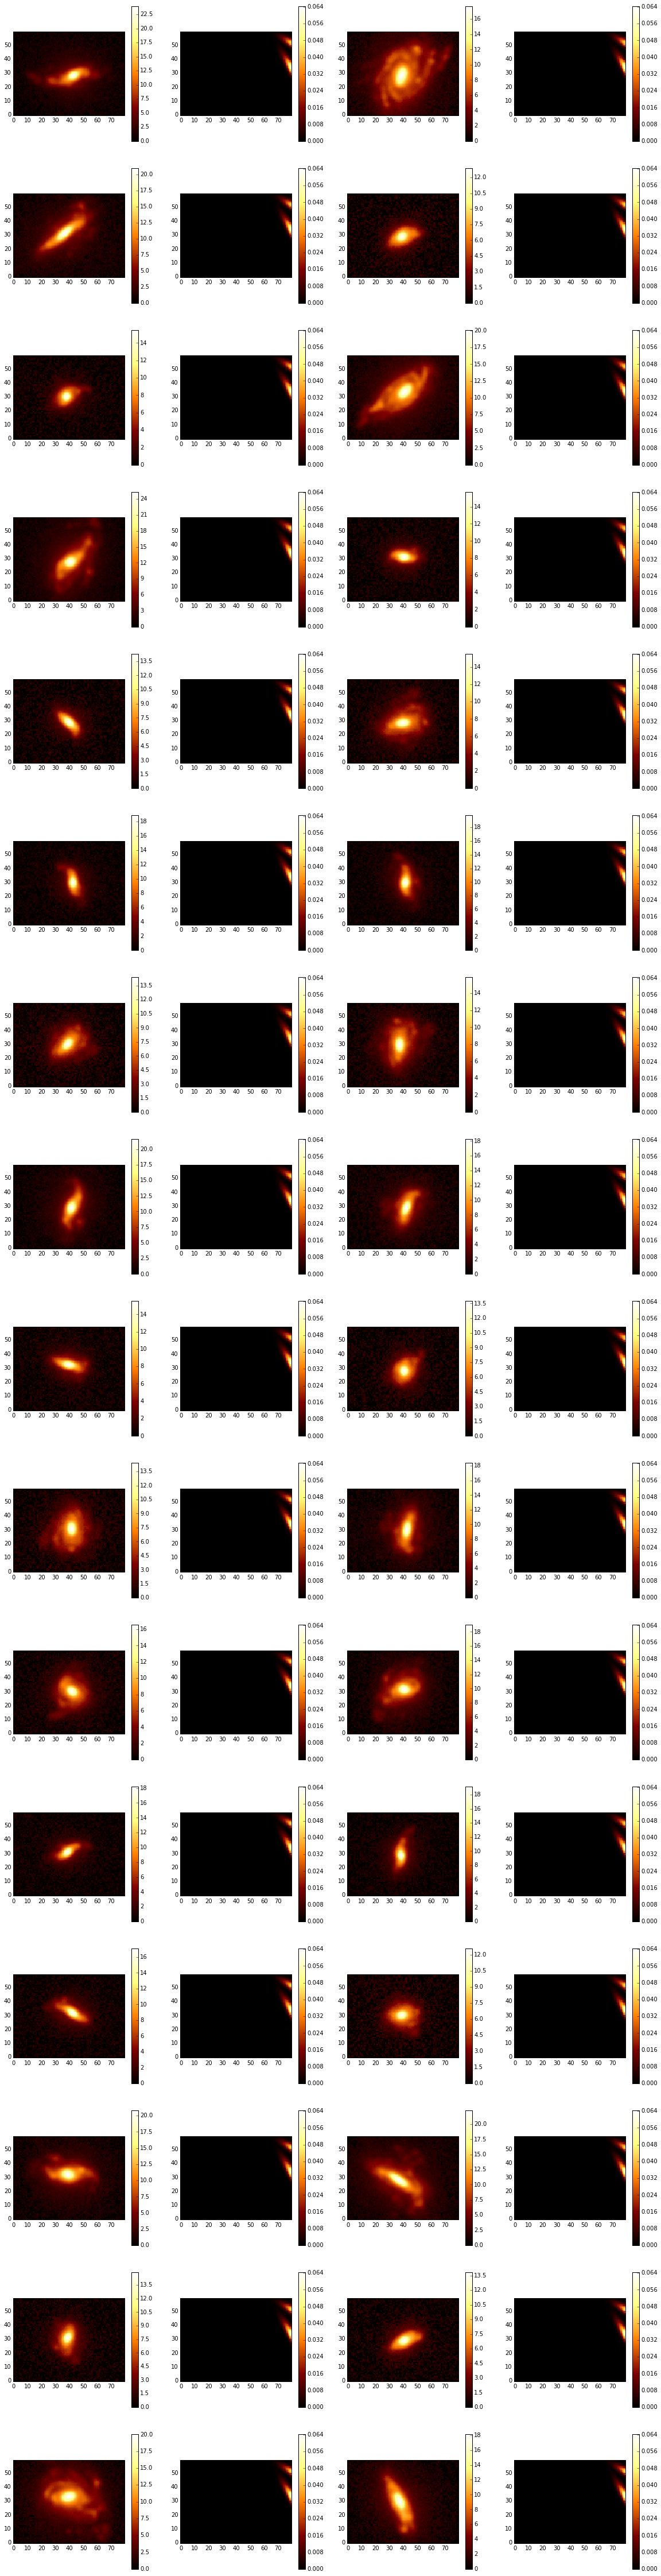

In [30]:
# initialisation
galpar0 = album_new.galaxy.get_parameters_vector()
print len(galpar0)
imgpar0 = (10., 30., 30., 0.1, 0.5, 14., 20., 0.)

print "album before", album_new(galpar0)
for image in album_new:
    print "image before", image(imgpar0)

showme(album_new)
plt.savefig("./fitting_pngs/illustris_242959_complex/initialisation.pdf")

In [ ]:
# run the thing!
import scipy.optimize as op
num_runs = 20

for i in xrange(num_runs):
    # album optimisation
    galpar0 = album_new.galaxy.get_parameters_vector()
    print "album before", album_new(galpar0)
    result = op.minimize(album_new, galpar0, method="Powell")
    galpar = result['x']
    print "album after", album_new(galpar)
    
    showme(album_new)
    plt.savefig("./fitting_pngs/illustris_242959_complex/run_%s_album.pdf" % str(2*i).zfill(2))
    plt.close()
    
    # image optimisation
    for image in album_new:
        imgpar0 = image.get_parameters_vector()
        print "image before", image(imgpar0)
        result = op.minimize(image, imgpar0)
        imgpar = result['x']
        print "image after", image(imgpar)

    showme(album_new)
    plt.savefig("./fitting_pngs/illustris_242959_complex/run_%s_image.pdf" % str(2*i+1).zfill(2))
    plt.close()

album before 

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:1778: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:1779: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
